In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('./data/bank-full.csv', delimiter=';')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<Axes: xlabel='y'>

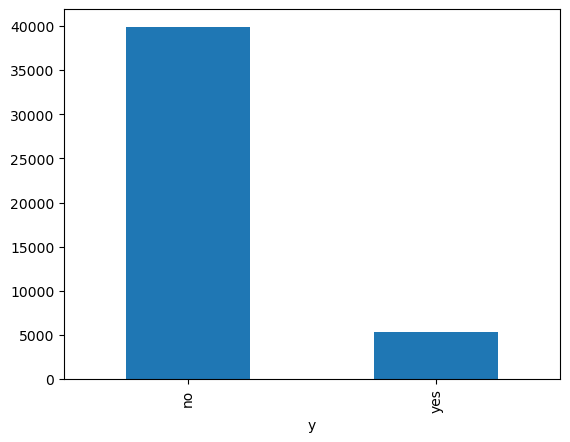

In [21]:
data['y'].value_counts().plot(kind='bar')

In [22]:
data = data.drop(columns=['contact', 'day', 'month', 'duration', 'pdays'])

In [ ]:
data['age'] = data['age'].astype(int)

binary_cols = ['default', 'housing', 'loan', 'y']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

data['poutcome'] = data['poutcome'].map({'failure': 0, 'unknown': 0, 'other': 0, 'success': 1})

data = pd.get_dummies(data, columns=['job', 'marital', 'education'], drop_first=True)

data.head()

,age,default,balance,housing,loan,campaign,previous,poutcome,y,job_blue-collar,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,1,0,0,0,False,...,False,False,False,False,False,True,False,False,True,False
1,44,0,29,1,0,1,0,0,0,False,...,False,False,True,False,False,False,True,True,False,False
2,33,0,2,1,1,1,0,0,0,False,...,False,False,False,False,False,True,False,True,False,False
3,47,0,1506,1,0,1,0,0,0,True,...,False,False,False,False,False,True,False,False,False,True
4,33,0,1,0,0,1,0,0,0,False,...,False,False,False,False,True,False,True,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'- {name} accuracy: {scores.mean()} (+/- {scores.std() * 2:.4f})')

- RandomForestClassifier CV accuracy: 0.8843 (+/- 0.0032)
- LogisticRegression CV accuracy: 0.8931 (+/- 0.0043)
- GradientBoostingClassifier CV accuracy: 0.8933 (+/- 0.0037)


In [ ]:
best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.69      0.17      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043

Confusion Matrix:
[[7868   84]
 [ 903  188]]
